In [1]:
from tensor import nn as nn
import tensor.optimizers as optimizers
import tensor.losses as losses
from utils import visualize
import nnfs
from nnfs.datasets import spiral_data
import numpy as np

nnfs.init()

In [2]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [3]:
class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.dense1 = nn.layer_dense(4, 3, 'relu', '0')
        self.dense2 = nn.layer_dense(4, 4, 'relu', '1')
        self.dense3 = nn.layer_dense(1, 4, 'tanh', '2')
    
    def forward(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x

In [4]:
model = Model()
optimizer = optimizers.SGD(model, 0.01)
loss_fn = losses.MSE()

print(model)
print(optimizer)
print(loss_fn)

Model Short Summary::

dense1: n_params: 16
dense2: n_params: 20
dense3: n_params: 5

Total params: 41

SGD optimizer
MSE loss fn


In [5]:
for _ in range(10000):
    y_pred = model.forward(xs)
    loss = loss_fn(ys, y_pred)
    print(f"epoch: {_}: current loss -> {loss.data}")
    
    model.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0: current loss -> 1.9163163602514666
epoch: 1: current loss -> 1.9128144142882497
epoch: 2: current loss -> 1.9090735116859758
epoch: 3: current loss -> 1.9050724507376067
epoch: 4: current loss -> 1.9007878959227797
epoch: 5: current loss -> 1.8961941744696735
epoch: 6: current loss -> 1.8912630653498277
epoch: 7: current loss -> 1.8871025786232072
epoch: 8: current loss -> 1.8834565551514617
epoch: 9: current loss -> 1.879644233370851
epoch: 10: current loss -> 1.8756578860917203
epoch: 11: current loss -> 1.8714896553049307
epoch: 12: current loss -> 1.867131603819723
epoch: 13: current loss -> 1.8625757783922199
epoch: 14: current loss -> 1.8578142855463018
epoch: 15: current loss -> 1.8528393811636468
epoch: 16: current loss -> 1.8476435746924416
epoch: 17: current loss -> 1.842219748467773
epoch: 18: current loss -> 1.8365612921232952
epoch: 19: current loss -> 1.8306622513768362
epoch: 20: current loss -> 1.8245174895709029
epoch: 21: current loss -> 1.8181228592313263
e

In [6]:
y_pred = model.forward(xs)
y_pred

array([[Tensor(0.9997158981956503)],
       [Tensor(-0.9972522551700859)],
       [Tensor(-0.9853297447009797)],
       [Tensor(0.9847931490769153)]], dtype=object)

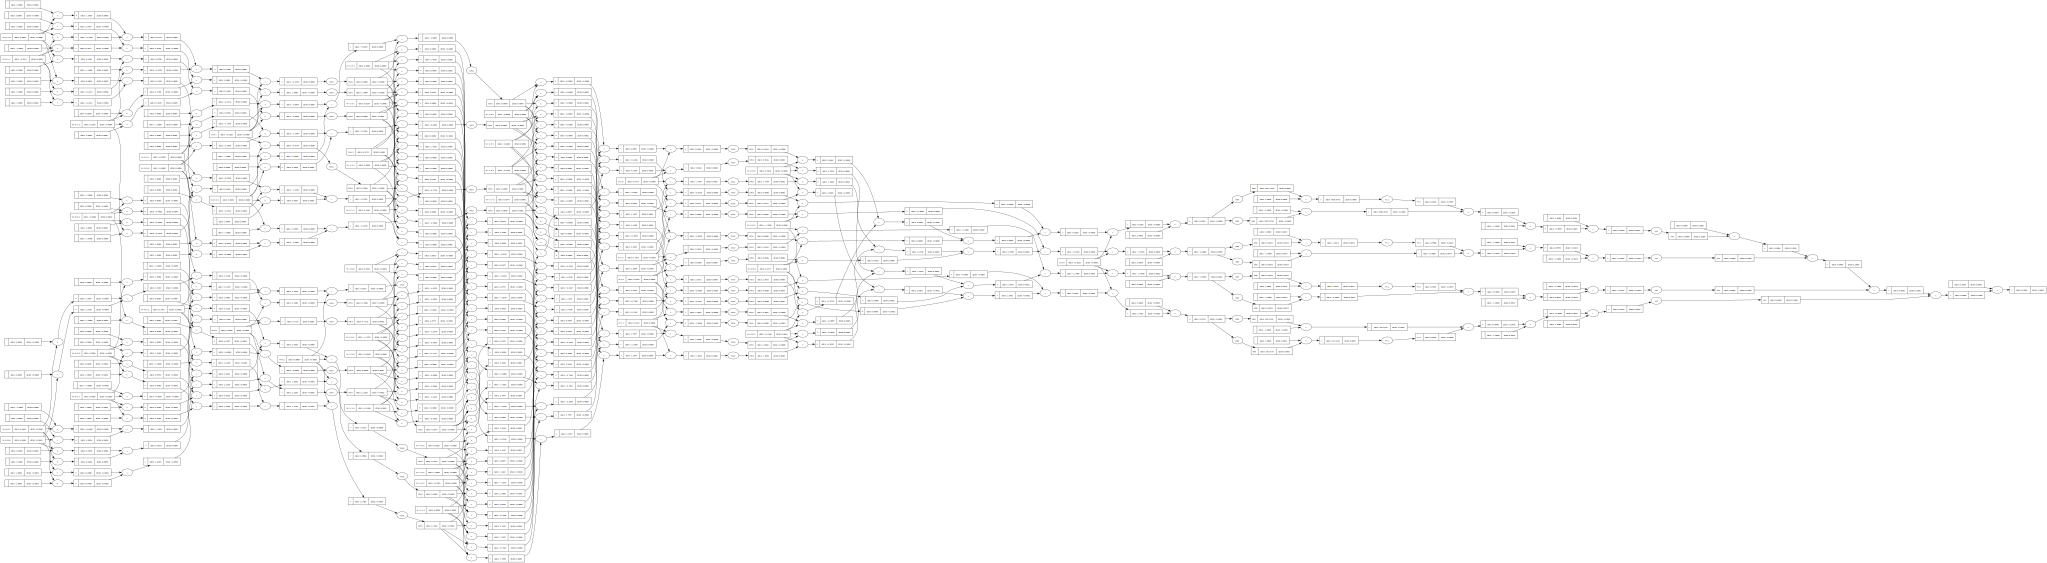

In [7]:
visualize.draw_dot(loss)